# 练习2, 多变量的梯度下降算法

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("ex1data2.txt", names = ["houseSize", "bedRomNumber", "price"])
data.head()

,houseSize,bedRomNumber,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


将data数据归一化，归一化的目的是为了让学习速率$\alpha$可以适应所有参数的方向

In [3]:
data = (data - data.mean())/data.std()
data.head()

,houseSize,bedRomNumber,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


将data转换为X 和 y数据，X数据添加一行1

In [4]:
data.insert(0, 'Ones', 1)   #这时候要给数据添加一行，是因为x0 是一列所有行全为1的列，他的作用是与theta0相乘。
colNumber = data.shape[1]   #计算出一共的列数
X = data.iloc[:,0:colNumber-1] #选取前3列，所有行
y = data.iloc[:,colNumber-1:colNumber] #选取最后一行，iloc是index location的意思，通过切片的方式，可以快速取出数据
y.shape

(47, 1)

将pandas格式转换为np格式，以便进行矩阵运算

In [5]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0,0.0]))

代价函数:

In [6]:
def costFun(X, y, theta):
    square = np.power((X * theta.T - y), 2)
    ret = square.sum() / (2.0 * len(y))
    return ret
    

代价函数的梯度下降算法

对于任何一个 ${\theta }_{j}$  
$${{\theta }_{j}}:={{\theta }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^{m}({h}_{\theta}({x}^{(i)}) - {y}^{(i)}) \cdot {x}^{(i)}_{j}$$

In [7]:
def gradientDescent(X,y,theta,iterNum,alpha):
    thetaBuffer = theta
    cost = np.zeros(iterNum)
    for i in range(iterNum):
        error = X * theta.T - y
        for j in range(len(theta.T)):
            temp = np.multiply(error, X[:,j:j+1])
            thetaBuffer[0,j] = theta[0,j] - ((alpha / len(y)) * temp.sum())
        theta = thetaBuffer
        cost[i] = costFun(X, y, theta)
    return theta, cost

运行批量梯度下降算法

In [8]:

g, cost = gradientDescent(X, y, theta, 1000, 0.01)



用plt查看结果,可以看到error在收敛

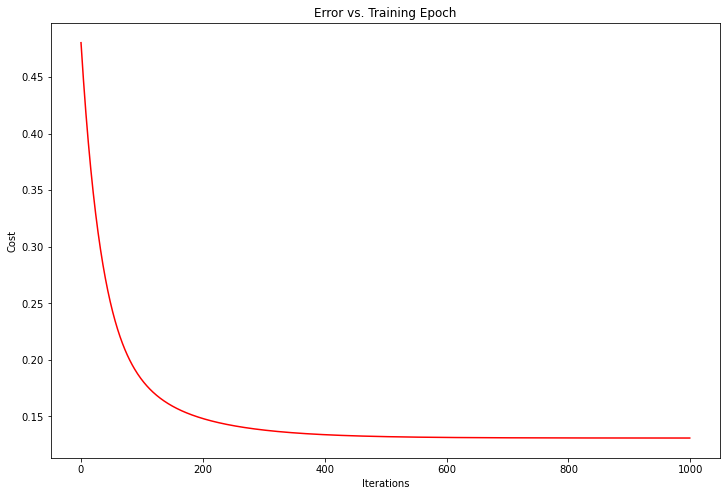

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1000), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()